<a href="https://colab.research.google.com/github/anujsahay112/MachineLearning_Python/blob/master/Movies_ML/Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
import re

In [0]:
movies=pd.read_csv("movies.csv")

In [5]:
print("Shape of the movies dataset")
print(movies.shape)
print()
print("Head of the movies dataset")
print(movies.head())

Shape of the movies dataset
(40789, 40)

Head of the movies dataset
   Unnamed: 0              Title  Year  ... Domestic_Gross Gross Date
0           1  39 Pounds of Love  2005  ...            NaN   NaN  NaN
1           2               3:am  2005  ...            NaN   NaN  NaN
2           3    500 Years Later  2005  ...            NaN   NaN  NaN
3           4          5th World  2005  ...            NaN   NaN  NaN
4           5                 90  2005  ...            NaN   NaN  NaN

[5 rows x 40 columns]


In [6]:
print(movies.describe())

          Unnamed: 0          Year  ...         Gross         Date
count   40789.000000  40789.000000  ...  4.583000e+03  4583.000000
mean    25116.814877   1980.954963  ...  9.029135e+07  2002.823696
std     24214.945395     25.020166  ...  1.669594e+08    12.044254
min         1.000000   1888.000000  ...  0.000000e+00  1915.000000
25%     10414.000000   1962.000000  ...  4.670743e+06  1999.000000
50%     20691.000000   1989.000000  ...  2.927690e+07  2005.000000
75%     31696.000000   2001.000000  ...  1.003587e+08  2011.000000
max    112382.000000   2018.000000  ...  2.783919e+09  2017.000000

[8 rows x 17 columns]


In [7]:
movies['Type'].value_counts()

movie     40000
series      725
game         64
Name: Type, dtype: int64

movies=df[df['Type']=="movie"]

In [8]:
print(sum(movies['Genre'].isnull()))
movies['Genre'].fillna('Drama',inplace=True)
print(sum(movies['Genre'].isnull()))

1034
0


In [9]:
movies.shape

(40789, 40)

# Get Minutes 

In [0]:
import re
def get_minutes(x):
    x=str(x)
    m=float('nan')
    m=re.match(r"(\d+)\s+h+(\d+)\s+m\w+",x)
    if m is not None:
        m=float(m.groups()[0]*60+m.groups()[1])
    m=re.match(r"(\d+)\s+m\w+",x)
    if m is not None:
        m=float(m.groups()[0])
    return m

In [0]:
movies['Runtime']=list(map(get_minutes,movies['Runtime']))

# Histogram

In [12]:
print(sum(movies['Runtime'].isnull()))
movies['Runtime'].fillna(np.mean(movies['Runtime']),inplace=True)
print(sum(movies['Runtime'].isnull()))

1137
0


In [13]:
movies['Runtime'].describe()

count    40789.000000
mean        81.651972
std         39.274574
min          1.000000
25%         71.000000
50%         90.000000
75%        100.000000
max        910.000000
Name: Runtime, dtype: float64

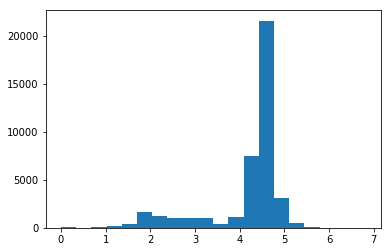

In [14]:
plt.hist(np.log(movies['Runtime']),bins=20)
plt.show()

In [15]:
print(sum(movies['Budget'].isnull()))
movies['Budget'].fillna(np.mean(movies['Budget']),inplace=True)
print(sum(movies['Budget'].isnull()))

36206
0


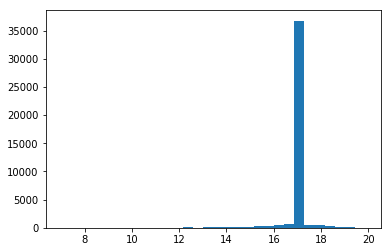

In [16]:
plt.hist(np.log(movies['Budget']),bins=30)
plt.show()

In [17]:
movies['Year'].describe()

count    40789.000000
mean      1980.954963
std         25.020166
min       1888.000000
25%       1962.000000
50%       1989.000000
75%       2001.000000
max       2018.000000
Name: Year, dtype: float64

In [18]:
print(sum(movies['Year'].isnull()))

0


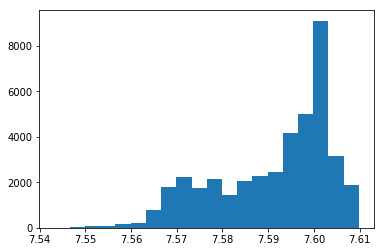

In [19]:
plt.hist(np.log(movies['Year']),bins=20)
plt.show()

# Wins and Nominations

In [0]:
import re
def nominations(a):
    a=str(a).lower()
    nom_1=0
    nom_2=0
    nom=0
    n1=re.findall(r"nominated\sfor\s\d+",a,re.I|re.M)
    n2=re.findall(r"\d+\s+nomination\w+",a,re.I|re.M)
    
    if(len(n1)>0):
        nom_1=int(re.match(r"\w+\s+\w+\s+(\d+)",n1[0]).groups()[0])
    if(len(n2)>0):
        nom_2=int(re.match(r"(\d+)\s+\w+",n2[0]).groups()[0])
    nom=nom_1+nom_2
    return nom

In [0]:
movies['Nominations']=list(map(nominations,movies['Awards']))

In [0]:
import re
def wins(a):
    a=str(a).lower()
    win1=0
    win2=0
    win=0
    w1=re.findall(r"won\s\d+",a,re.I|re.M)
    w2=re.findall(r"\d+\s+wins\w+",a,re.I|re.M)
    
    if(len(w1)>0):
        win1=int(re.match(r"\w+\s+(\d+)",w1[0]).groups()[0])
    if(len(w2)>0):
        win2=int(re.match(r"(\d+)\s+\w+",w2[0]).groups()[0])
    win=win1+win2
    return win

In [0]:
movies['Wins']=list(map(wins,movies['Awards']))

# Genre Segregation

In [25]:
type(movies['Genre'])

pandas.core.series.Series

In [0]:
new_all=[]
all_genres=[]
unique_all=[]
for i in movies['Genre']:
        new_all.append(str(i).split(','))
new_all=list(chain(*new_all))
for i in new_all:
    all_genres.append(i.strip())
unique_all=set(all_genres)


In [27]:
unique_all

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

In [0]:
d={}
for i in unique_all:
    d[i]=[]
    for j in movies['Genre']:
        j=str(j).strip()
        if i in j:
            d[i].append(1)
        else:
            d[i].append(0)

In [29]:
sum(d['War'])

1085

In [0]:
for keys in d.keys():
    #for i in range(len(movies['Genre'])):
    list_key=pd.Series(d[keys])
        #movies[keys].loc[i]=d[keys][i]
    movies[keys]=d[keys]    
    #movies.insert(loc=0,column=keys,value=d[keys])    

In [31]:
sum(movies['War'])

1085

# Top Genres

In [0]:
new_all=[]
all_genres=[]
unique_all=[]
for i in movies['Genre']:
        new_all.append(str(i).split(','))
new_all=list(chain(*new_all))
for i in new_all:
    all_genres.append(i.strip())
unique_all=set(all_genres)

In [33]:
count={}
for i in unique_all:
    count[i]=1
    for j in new_all:
        if i in j:
            count[i]=count[i]+1
print(count)

{'Musical': 1391, 'Documentary': 3090, 'Talk-Show': 24, 'Reality-TV': 30, 'Adventure': 3015, 'Family': 2712, 'Biography': 1125, 'Crime': 4151, 'Western': 1329, 'News': 23, 'Sci-Fi': 1663, 'Romance': 5031, 'Thriller': 3416, 'Fantasy': 1449, 'Comedy': 13073, 'Music': 2588, 'Film-Noir': 353, 'Game-Show': 15, 'Sport': 536, 'Action': 4520, 'Short': 6524, 'History': 854, 'Mystery': 1705, 'Horror': 2744, 'Animation': 2847, 'Drama': 17219, 'Adult': 423, 'War': 1086}


In [34]:
sorted_count=sorted(count.items(),key=lambda x:x[1],reverse=True)
print(sorted_count)
top10=sorted_count[0:10]
print(top10)

[('Drama', 17219), ('Comedy', 13073), ('Short', 6524), ('Romance', 5031), ('Action', 4520), ('Crime', 4151), ('Thriller', 3416), ('Documentary', 3090), ('Adventure', 3015), ('Animation', 2847), ('Horror', 2744), ('Family', 2712), ('Music', 2588), ('Mystery', 1705), ('Sci-Fi', 1663), ('Fantasy', 1449), ('Musical', 1391), ('Western', 1329), ('Biography', 1125), ('War', 1086), ('History', 854), ('Sport', 536), ('Adult', 423), ('Film-Noir', 353), ('Reality-TV', 30), ('Talk-Show', 24), ('News', 23), ('Game-Show', 15)]
[('Drama', 17219), ('Comedy', 13073), ('Short', 6524), ('Romance', 5031), ('Action', 4520), ('Crime', 4151), ('Thriller', 3416), ('Documentary', 3090), ('Adventure', 3015), ('Animation', 2847)]


In [35]:
x=[]
name=[]
for i in range(len(top10)):
    x.append(top10[i][1])
    name.append(top10[i][0])
print(x)
print(name)

[17219, 13073, 6524, 5031, 4520, 4151, 3416, 3090, 3015, 2847]
['Drama', 'Comedy', 'Short', 'Romance', 'Action', 'Crime', 'Thriller', 'Documentary', 'Adventure', 'Animation']


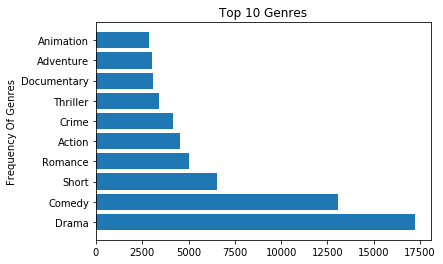

In [36]:
y_pos = np.arange(len(name))
 
plt.barh(y_pos, x, align='center', alpha=1)
plt.yticks(y_pos, name)
plt.ylabel('Frequency Of Genres')
plt.title('Top 10 Genres')
 
plt.show()

# Corrrelation and Scatter Plot

0.21153495906499414


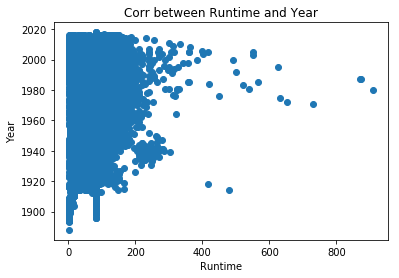

In [37]:
print(movies['Runtime'].corr(movies['Year']))
plt.scatter(movies['Runtime'],movies['Year'])
plt.xlabel("Runtime")
plt.ylabel("Year")
plt.title("Corr between Runtime and Year")
plt.show()

0.740910444013941


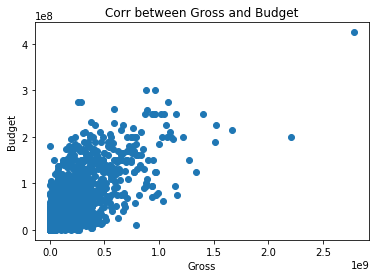

In [38]:
print(movies['Gross'].corr(movies['Budget']))
plt.scatter(movies['Gross'],movies['Budget'])
plt.xlabel("Gross")
plt.ylabel("Budget")
plt.title("Corr between Gross and Budget")
plt.show()

0.2064908477539623


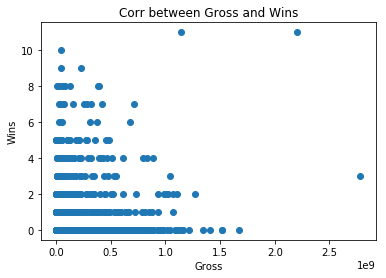

In [39]:
print(movies['Gross'].corr(movies['Wins']))
plt.scatter(movies['Gross'],movies['Wins'])
plt.xlabel("Gross")
plt.ylabel("Wins")
plt.title("Corr between Gross and Wins")
plt.show()

0.35589647515820405


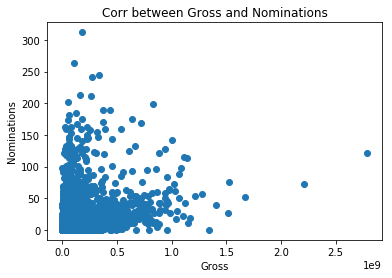

In [40]:
print(movies['Gross'].corr(movies['Nominations']))
plt.scatter(movies['Gross'],movies['Nominations'])
plt.xlabel("Gross")
plt.ylabel("Nominations")
plt.title("Corr between Gross and Nominations")
plt.show()

0.7936664439475296


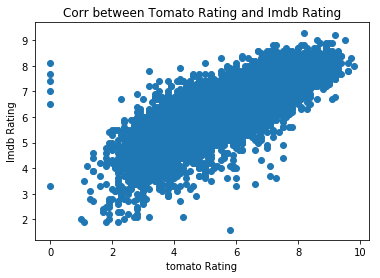

In [41]:
print(movies['tomatoRating'].corr(movies['imdbRating']))
plt.scatter(movies['tomatoRating'],movies['imdbRating'])
plt.xlabel("tomato Rating")
plt.ylabel("Imdb Rating")
plt.title("Corr between Tomato Rating and Imdb Rating")
plt.show()

0.028030846184890428


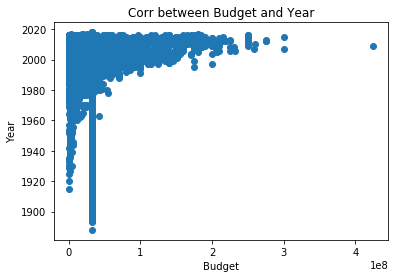

In [42]:
print(movies['Budget'].corr(movies['Year']))
plt.scatter(movies['Budget'],movies['Year'])
plt.xlabel("Budget")
plt.ylabel("Year")
plt.title("Corr between Budget and Year")
plt.show()

# Gross Value Missing

In [43]:
sum(movies['Gross'].isnull())

36206

In [0]:
movies.dropna(subset=['Gross'],inplace=True)

In [50]:
print(sum(movies['Gross'].isnull()))
print(movies.shape)

0
(3183, 70)


# Movies Greater than Year 2000

In [0]:
movies=movies[movies['Year']>2000]

In [52]:
movies['Year'].describe()

count    3183.000000
mean     2008.409362
std         4.364217
min      2001.000000
25%      2005.000000
50%      2008.000000
75%      2012.000000
max      2017.000000
Name: Year, dtype: float64

# Getting only Numerical Values

In [0]:
movies_new=movies.select_dtypes(include='number')

In [54]:
print(movies.shape)
print(movies_new.shape)
movies_new.describe()

(3183, 70)
(3183, 48)


,Unnamed: 0,Year,Runtime,Metascore,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,Budget,Domestic_Gross,Gross,Date,Nominations,Wins,Musical,Documentary,Talk-Show,Reality-TV,Adventure,Family,Biography,Crime,Western,News,Sci-Fi,Romance,Thriller,Fantasy,Comedy,Music,Film-Noir,Game-Show,Sport,Action,Short,History,Mystery,Horror,Animation,Drama,Adult,War
count,3183.000000,3183.000000,3183.000000,2747.000000,3136.000000,3.136000e+03,2775.000000,2775.000000,2776.000000,2776.000000,2776.000000,2974.000000,2976.000000,3.077000e+03,3.183000e+03,3.183000e+03,3.183000e+03,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.0,3183.0,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.0,3183.0,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000
mean,70506.075715,2008.409362,104.184182,52.939934,6.298119,8.499268e+04,51.945225,5.607387,127.347983,73.070245,54.277738,58.263282,3.299765,4.757295e+05,3.495036e+07,4.266471e+07,9.662560e+07,2008.600063,13.222117,0.091423,0.010053,0.039271,0.0,0.0,0.170280,0.071002,0.060949,0.168395,0.007540,0.000628,0.072573,0.170908,0.157399,0.073201,0.373547,0.044926,0.0,0.0,0.027647,0.218976,0.006598,0.027019,0.084826,0.106189,0.052466,0.485705,0.000314,0.017279
std,49746.039422,4.364217,19.912862,17.665430,1.103924,1.326763e+05,27.468142,1.447502,67.324916,63.502042,37.517078,19.835778,0.497682,3.269837e+06,4.516520e+07,6.841590e+07,1.815449e+08,4.368833,27.717927,0.525406,0.099777,0.194270,0.0,0.0,0.375937,0.256869,0.239274,0.374275,0.086519,0.025063,0.259475,0.376488,0.364233,0.260508,0.483821,0.207175,0.0,0.0,0.163985,0.413617,0.080970,0.162163,0.278666,0.308128,0.223000,0.499874,0.017725,0.130331
min,13.000000,2001.000000,1.000000,1.000000,1.600000,5.000000e+00,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.100000e+03,0.000000e+00,0.000000e+00,2000.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13153.000000,2005.000000,92.000000,40.000000,5.700000,8.705750e+03,29.000000,4.500000,81.000000,20.000000,23.750000,44.000000,3.000000,9.848000e+03,5.000000e+06,6.311760e+05,2.404040e+06,2005.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110321.000000,2008.000000,101.000000,53.000000,6.400000,3.637600e+04,52.000000,5.600000,128.500000,57.000000,49.000000,60.000000,3.300000,5.139500e+04,2.000000e+07,1.701842e+07,3.016378e+07,2009.000000,4.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,111133.500000,2012.000000,114.000000,66.000000,7.100000,1.018922e+05,76.000000,6.700000,171.000000,111.000000,80.000000,74.000000,3.600000,1.889070e+05,4.500000e+07,5.382614e+07,1.028745e+08,2012.000000,12.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,111998.000000,2017.000000,334.000000,100.000000,9.000000,1.670736e+06,100.000000,9.200000,355.000000,343.000000,249.000000,100.000000,5.000000,3.467543e+07,4.250000e+08,7.605076e+08,2.783919e+09,2017.000000,312.000000,11.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1

# Removing Null Values

In [55]:
movies_new['Metascore'].describe()
print(sum(movies_new['Metascore'].isnull()))

436


In [56]:
movies_new['Metascore'].fillna(np.mean(movies_new['Metascore']),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [57]:
movies_new['imdbRating'].describe()
movies_new['imdbRating'].value_counts()
sum(movies_new['imdbRating'].isnull())

47

In [58]:
movies_new['imdbRating'].fillna(np.mean(movies_new['imdbRating']),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [59]:
movies_new['imdbVotes'].describe()
movies_new['imdbVotes'].value_counts()
sum(movies_new['imdbVotes'].isnull())

47

In [60]:
movies_new['imdbVotes'].fillna(np.mean(movies_new['imdbVotes']),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [61]:
movies_new['tomatoMeter'].describe()
movies_new['tomatoMeter'].value_counts()
sum(movies_new['tomatoMeter'].isnull())

408

In [62]:
movies_new['tomatoMeter'].fillna(np.mean(movies_new['tomatoMeter']),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [63]:
movies_new['tomatoFresh'].fillna(np.mean(movies_new['tomatoFresh']),inplace=True)
movies_new['tomatoRating'].fillna(np.mean(movies_new['tomatoRating']),inplace=True)
movies_new['tomatoRotten'].fillna(np.mean(movies_new['tomatoRotten']),inplace=True)
movies_new['tomatoUserMeter'].fillna(np.mean(movies_new['tomatoUserMeter']),inplace=True)
movies_new['tomatoUserRating'].fillna(np.mean(movies_new['tomatoUserRating']),inplace=True)
movies_new['tomatoUserReviews'].fillna(np.mean(movies_new['tomatoUserReviews']),inplace=True)
movies_new['tomatoReviews'].fillna(np.mean(movies_new['tomatoReviews']),inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [64]:
X=movies_new.loc[:,movies_new.columns !='Gross']
X.head()

,Unnamed: 0,Year,Runtime,Metascore,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,Budget,Domestic_Gross,Date,Nominations,Wins,Musical,Documentary,Talk-Show,Reality-TV,Adventure,Family,Biography,Crime,Western,News,Sci-Fi,Romance,Thriller,Fantasy,Comedy,Music,Film-Noir,Game-Show,Sport,Action,Short,History,Mystery,Horror,Animation,Drama,Adult,War
12,13,2005,96.0,9.0,2.3,37613.0,1.0,1.7,117.0,1.0,116.0,10.0,2.0,57878.0,20000000.0,5178569.0,2005.0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20,21,2005,95.0,27.0,4.6,22611.0,11.0,3.3,116.0,13.0,103.0,45.0,3.1,401851.0,20000000.0,82674398.0,2005.0,8,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
26,27,2005,118.0,37.0,5.7,59443.0,30.0,4.6,169.0,50.0,119.0,42.0,2.8,212460.0,75000000.0,55849401.0,2005.0,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
27,28,2005,105.0,53.0,5.5,13197.0,37.0,5.3,115.0,43.0,72.0,62.0,3.3,65086.0,25000000.0,36351350.0,2005.0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
28,29,2005,106.0,54.0,6.4,8427.0,54.0,5.8,119.0,64.0,55.0,63.0,3.3,42035.0,15000000.0,32647042.0,2005.0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [65]:
X=X.loc[:,X.columns !='Unnamed: 0']
#X=X.reset_index()
#X=X.loc[:,X.columns !='index']
X.head()

,Year,Runtime,Metascore,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,tomatoUserMeter,tomatoUserRating,tomatoUserReviews,Budget,Domestic_Gross,Date,Nominations,Wins,Musical,Documentary,Talk-Show,Reality-TV,Adventure,Family,Biography,Crime,Western,News,Sci-Fi,Romance,Thriller,Fantasy,Comedy,Music,Film-Noir,Game-Show,Sport,Action,Short,History,Mystery,Horror,Animation,Drama,Adult,War
12,2005,96.0,9.0,2.3,37613.0,1.0,1.7,117.0,1.0,116.0,10.0,2.0,57878.0,20000000.0,5178569.0,2005.0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
20,2005,95.0,27.0,4.6,22611.0,11.0,3.3,116.0,13.0,103.0,45.0,3.1,401851.0,20000000.0,82674398.0,2005.0,8,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
26,2005,118.0,37.0,5.7,59443.0,30.0,4.6,169.0,50.0,119.0,42.0,2.8,212460.0,75000000.0,55849401.0,2005.0,13,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
27,2005,105.0,53.0,5.5,13197.0,37.0,5.3,115.0,43.0,72.0,62.0,3.3,65086.0,25000000.0,36351350.0,2005.0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
28,2005,106.0,54.0,6.4,8427.0,54.0,5.8,119.0,64.0,55.0,63.0,3.3,42035.0,15000000.0,32647042.0,2005.0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [66]:
Y=movies_new['Gross']
Y.head()
Y.describe()

count    3.183000e+03
mean     9.662560e+07
std      1.815449e+08
min      0.000000e+00
25%      2.404040e+06
50%      3.016378e+07
75%      1.028745e+08
max      2.783919e+09
Name: Gross, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.head())
print(Y_train.head())

       Year     Runtime  Metascore  imdbRating  ...  Animation  Drama  Adult  War
40330  2002  127.000000  72.000000    7.000000  ...          0      1      0    0
5166   2001  122.000000  54.000000    6.800000  ...          0      0      0    0
39779  2007   95.000000  52.000000    6.200000  ...          0      1      0    0
39767  2007   96.000000  37.000000    5.400000  ...          0      0      0    0
38886  2011   81.651972  52.939934    6.298119  ...          1      0      0    0

[5 rows x 46 columns]
40330     80491516.0
5166      68712365.0
39779      3922043.0
39767    174131329.0
38886    157956466.0
Name: Gross, dtype: float64


In [69]:
X.shape

(3183, 46)

# Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression(normalize=True)
model_linear.fit(X_train, Y_train)
print("Linear Model:", model_linear)
print("coeffecients:", model_linear.coef_)
print("Intercept:", model_linear.intercept_)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
coeffecients: [-3.65252242e+06 -5.64272094e+04  8.86508173e+04  2.49014404e+06
  4.08902081e+01  2.77226754e+03  1.87106215e+06  4.42991916e+17
 -4.42991916e+17 -4.42991916e+17 -2.97625155e+05  6.54169902e+06
 -4.26227581e-01  7.63843992e-01  2.09540343e+00  5.45973841e+06
  1.11690627e+04  9.57192477e+06  7.58734573e+06  4.93806796e+06
  1.55260089e+18  2.62181088e+17  7.19346681e+06 -1.24641683e+07
 -9.43846147e+06 -8.01706664e+06 -2.06368980e+07 -3.71821591e+06
 -1.51773636e+06  2.45517909e+06 -1.31536473e+06  7.95849212e+06
 -1.26017777e+07  2.36266543e+06 -5.55542388e+14  8.71239629e+13
 -2.62292688e+07 -5.71962071e+06 -5.32012563e+05 -3.23590651e+06
 -1.27167658e+06 -1.98932885e+06  4.75046260e+06 -1.43577112e+06
  0.00000000e+00 -7.08091393e+06]
Intercept: -3655607570.6411433


In [71]:
print('R squared value:', model_linear.score(X_test, Y_test))

R squared value: 0.8983214124148061


In [74]:
train_set=list(range(1,2400,200))
print(train_set)
print(type(train_set))
train_set.append(2530)
print(train_set)

[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201]
<class 'list'>
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2530]


In [0]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = LinearRegression(), X = X,
                                                   y = Y, train_sizes = train_set, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

In [76]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 40) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000e+00
201     1.248315e+15
401     2.433701e+15
601     2.455038e+15
801     2.428532e+15
1001    2.618007e+15
1201    2.951770e+15
1401    2.859006e+15
1601    2.884168e+15
1801    2.918392e+15
2001    2.888285e+15
2201    2.816721e+15
2530    2.723790e+15
dtype: float64

 ----------------------------------------

Mean validation scores

 1       4.089763e+16
201     4.181988e+15
401     4.021225e+15
601     3.411481e+15
801     3.177105e+15
1001    3.012532e+15
1201    3.085796e+15
1401    3.071826e+15
1601    3.035461e+15
1801    2.988694e+15
2001    2.997313e+15
2201    2.972693e+15
2530    2.937756e+15
dtype: float64


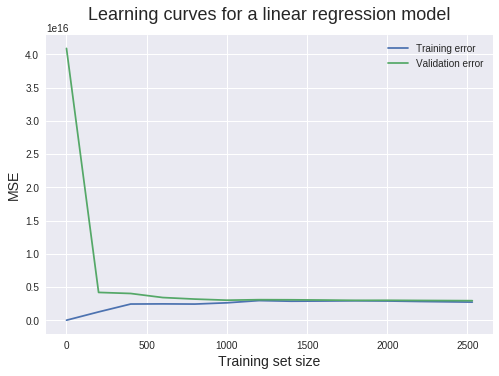

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_set, train_scores_mean, label = 'Training error')
plt.plot(train_set, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,40)
plt.show()

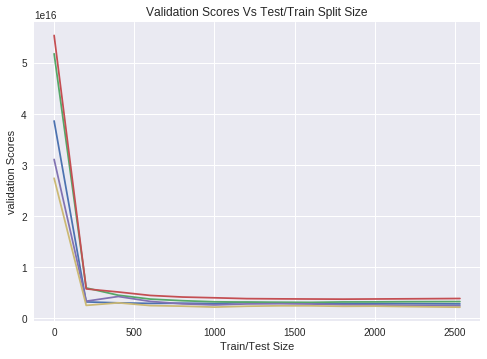

In [78]:
plt.plot(train_sizes,-validation_scores)
plt.ylabel('validation Scores')
plt.xlabel('Train/Test Size')
plt.title("Validation Scores Vs Test/Train Split Size")
plt.show()

In [0]:
Y_predictions = model_linear.predict(X_test)
#Y_predictions[Y_predictions<0]=0
print(Y_predictions)

[ 1.01057977e+08 -2.29673563e+07  2.37789291e+07 -5.57842035e+06
  9.26251133e+07 -1.42514846e+07  1.56487333e+08  6.41203983e+07
 -2.53527607e+06  6.02348056e+07  6.62022341e+05  2.35316344e+08
 -1.66944857e+07  2.40157680e+06 -4.67616020e+05  6.10726719e+06
 -1.06165295e+07 -1.08989888e+07  3.63220449e+07  1.30480669e+08
  8.77384966e+05  9.07421275e+07  1.23706264e+08  3.41682593e+07
 -2.41748359e+07  5.64848054e+07  8.10538123e+07 -1.45407695e+07
  1.62729669e+07 -5.05093559e+06  8.07714297e+08  6.03627218e+08
 -3.97253943e+07  6.18211784e+07  7.90165954e+05 -1.97925303e+07
  2.36419139e+08  2.67561350e+08  8.20617087e+06  2.15392275e+07
  7.73959666e+07  1.53853408e+08  3.46476775e+07  3.58779929e+08
  3.14908756e+08  3.03151356e+07  5.36274768e+05  1.07255733e+08
  5.65728424e+06  4.42480425e+06 -7.57914665e+06  4.72700449e+07
 -6.48236981e+06 -1.18365045e+07 -3.96360785e+06  1.17679473e+08
  6.41168710e+07  4.62537659e+08  1.43981039e+08 -1.43275043e+07
  1.34223997e+08 -2.40869

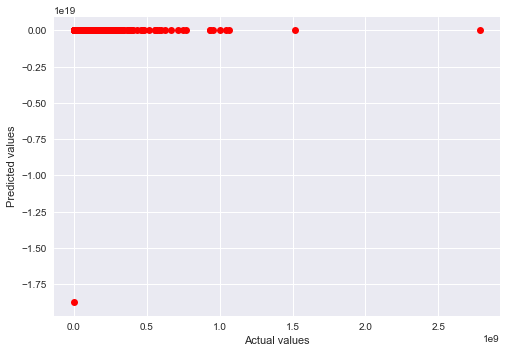

In [0]:
plt.plot(Y_test, Y_predictions,'ro')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

# BoxCox Transformation

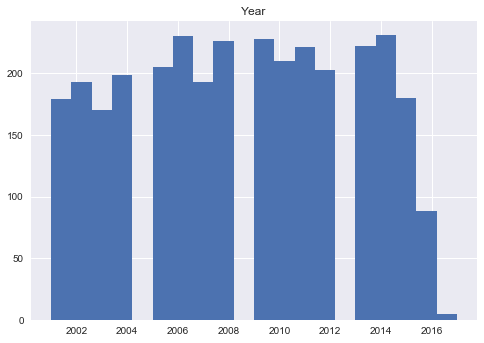

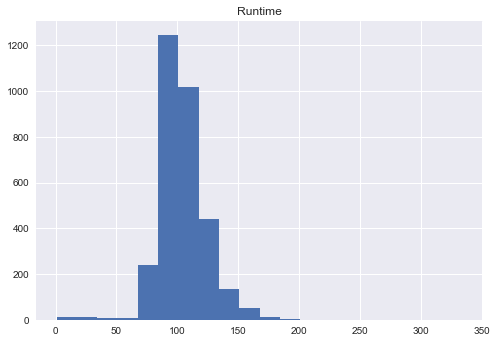

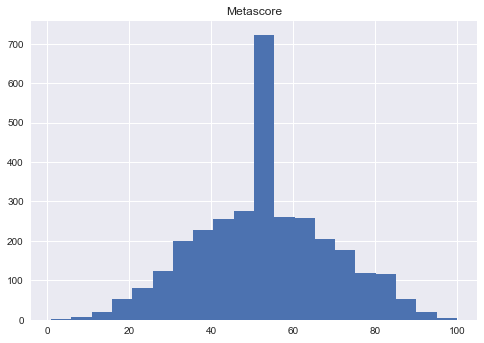

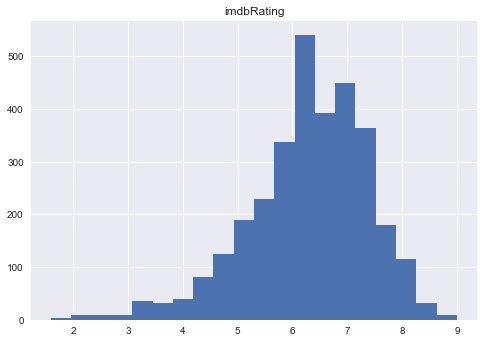

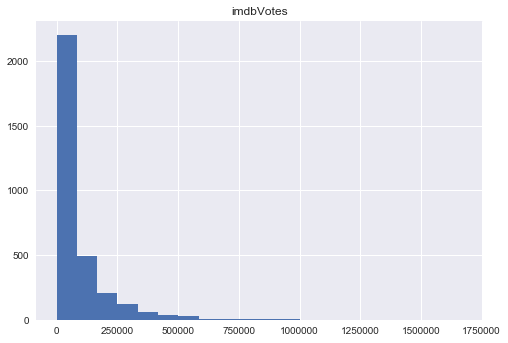

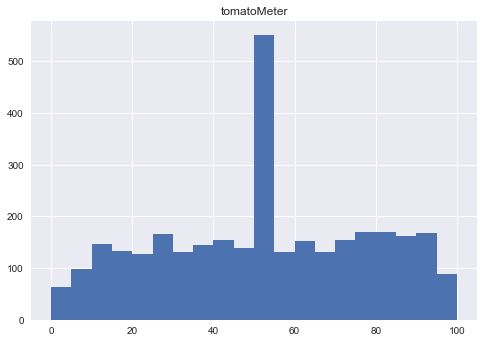

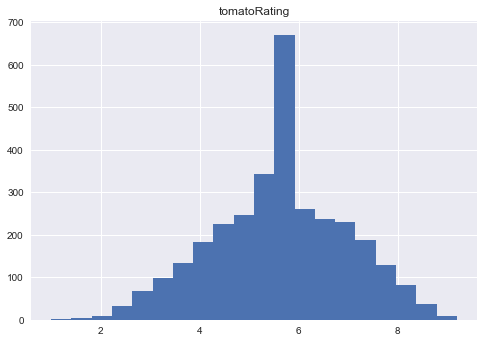

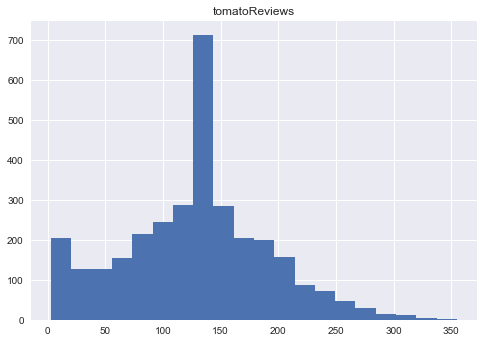

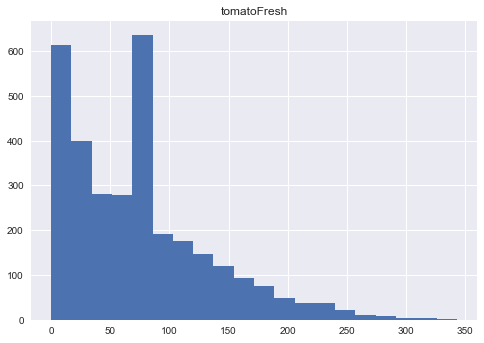

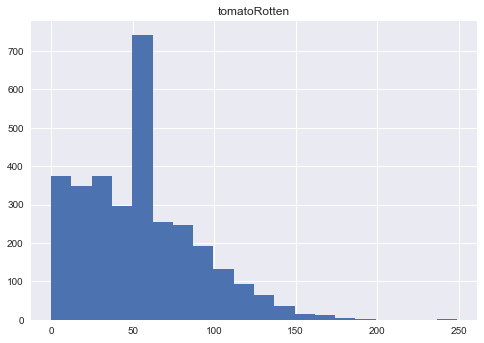

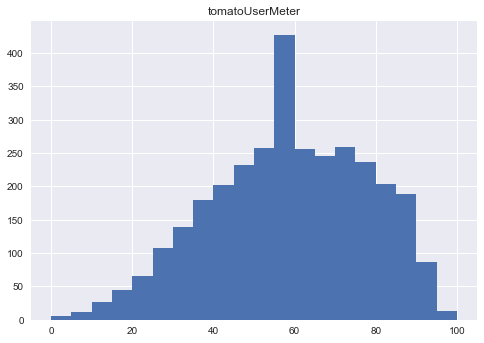

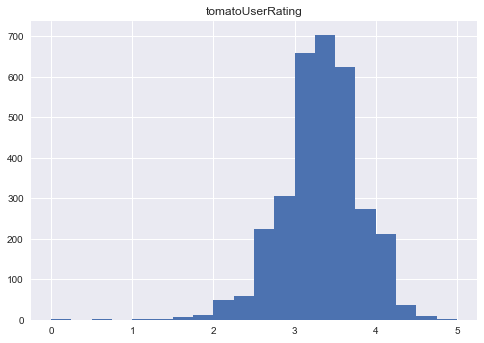

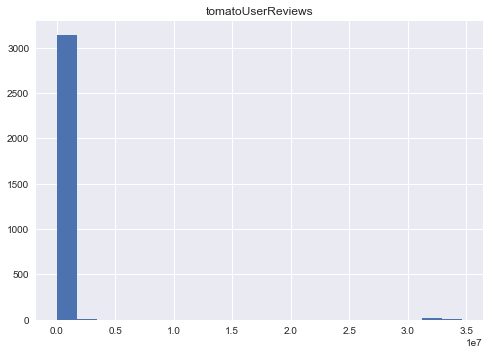

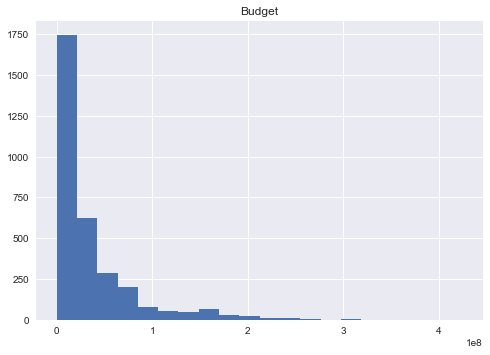

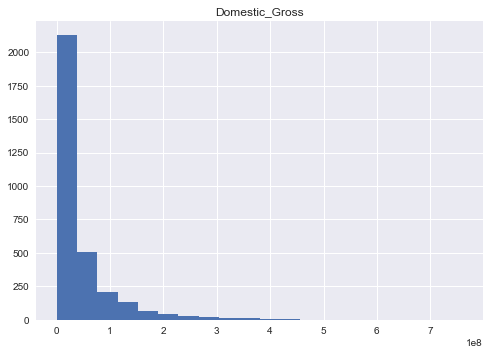

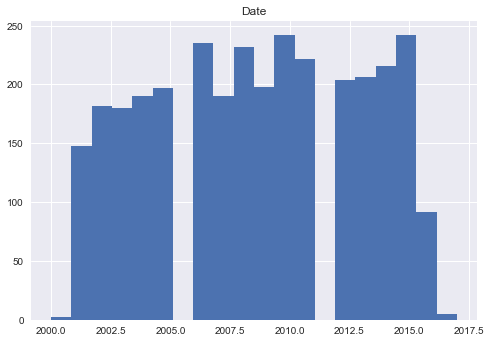

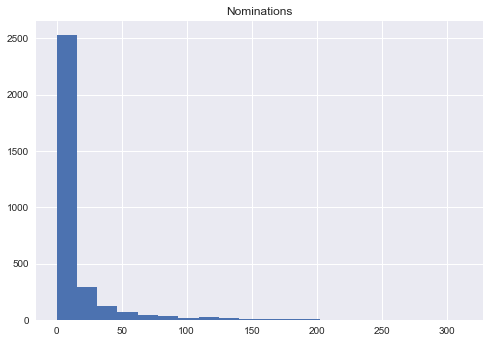

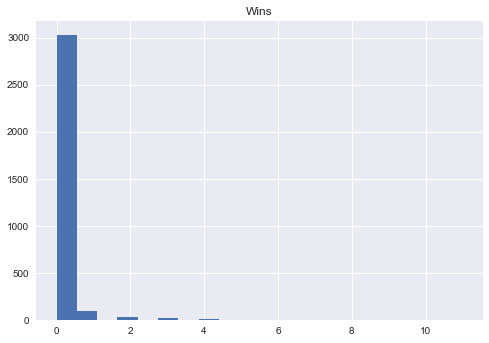

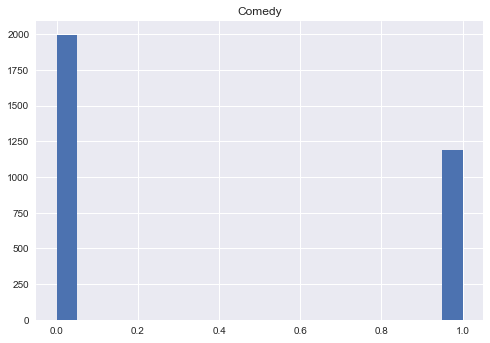

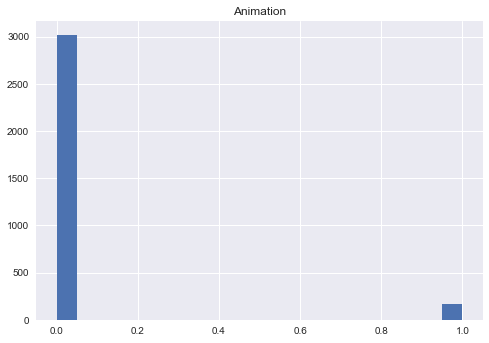

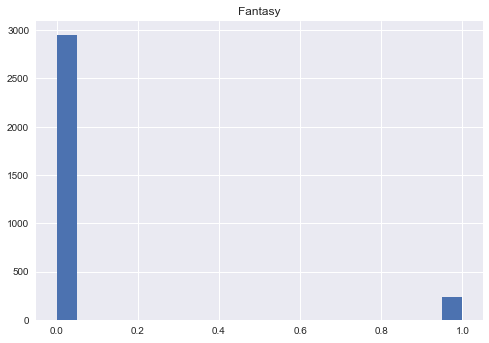

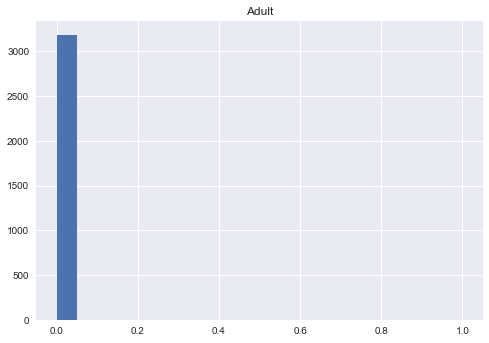

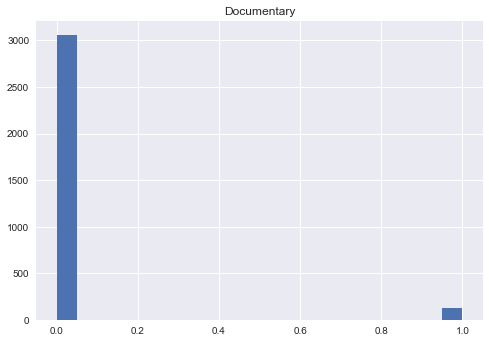

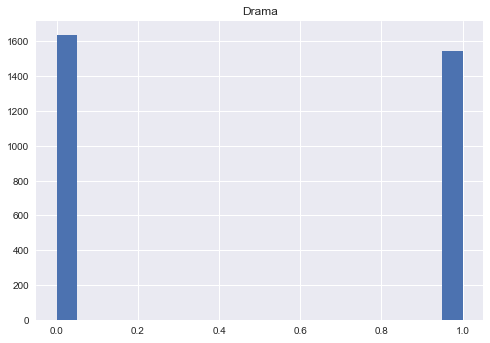

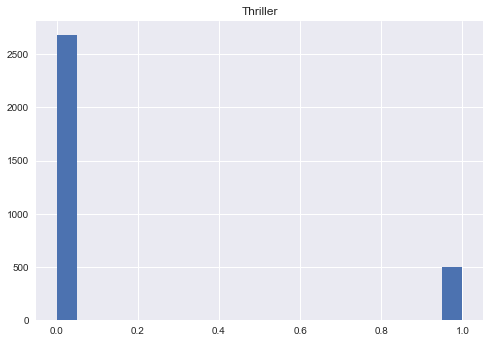

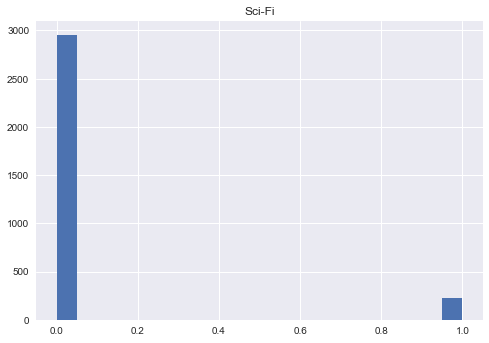

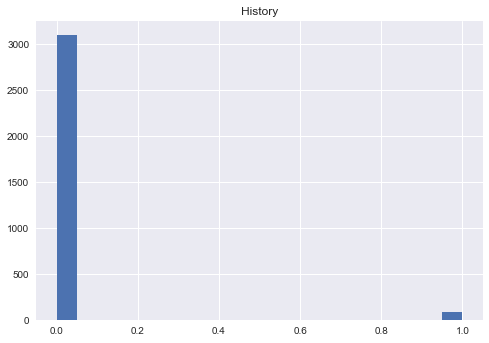

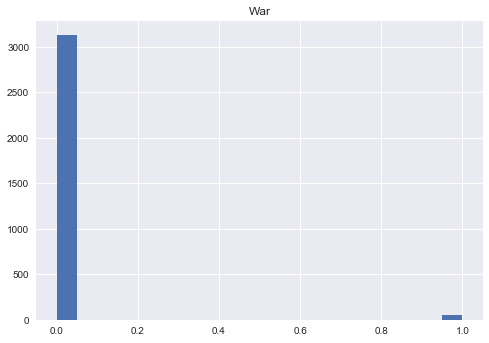

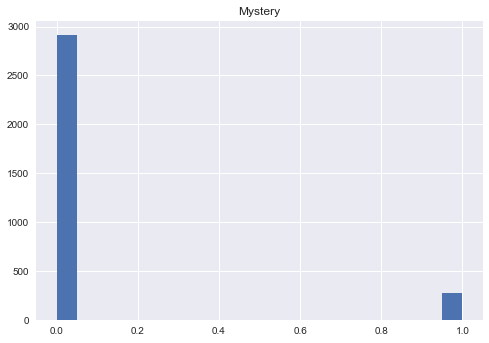

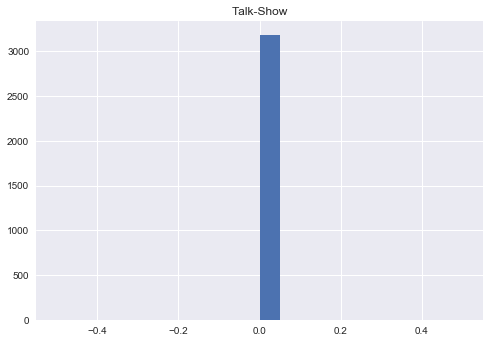

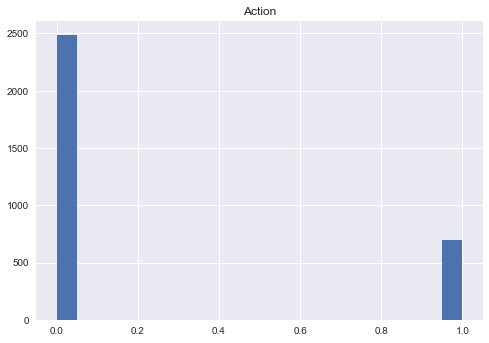

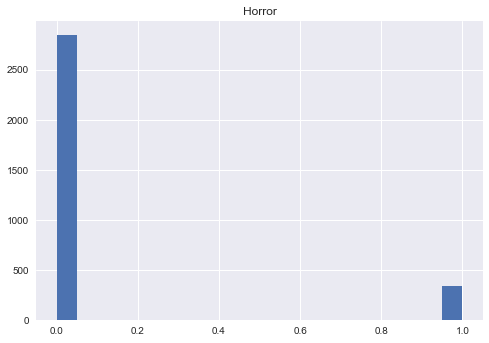

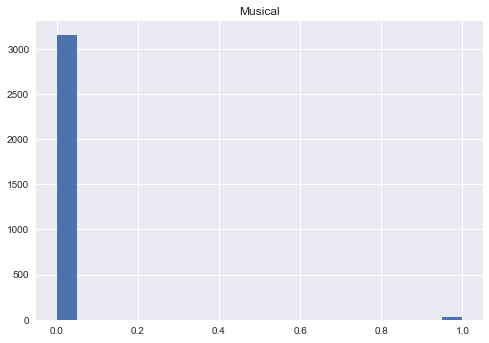

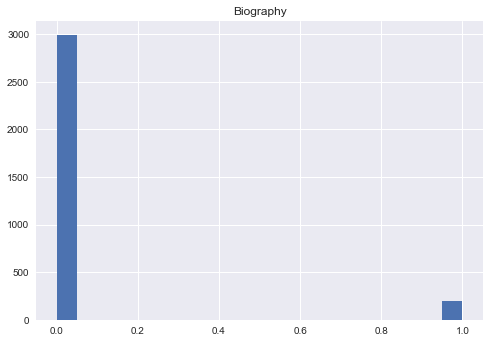

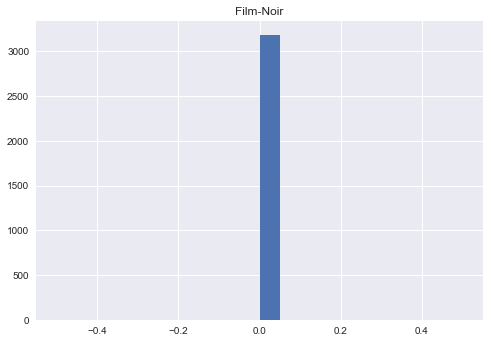

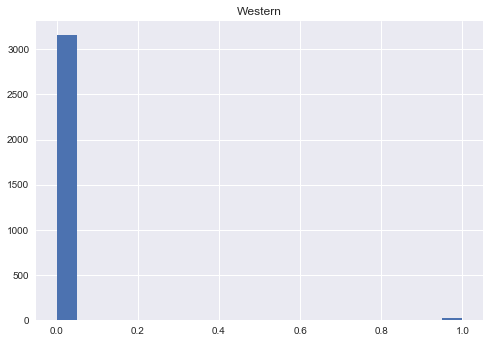

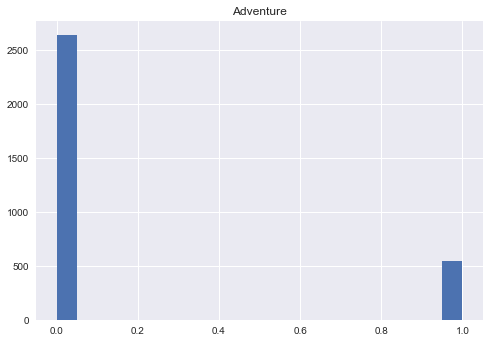

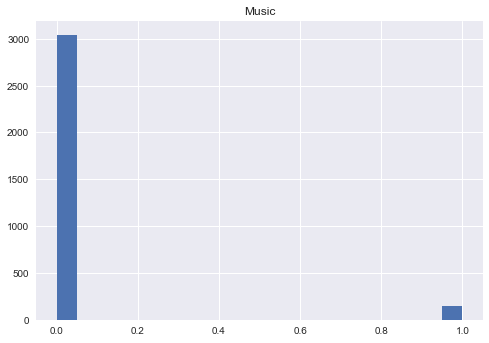

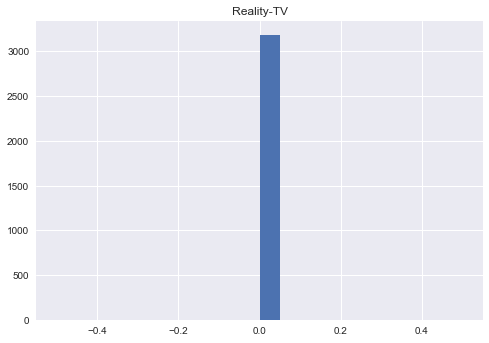

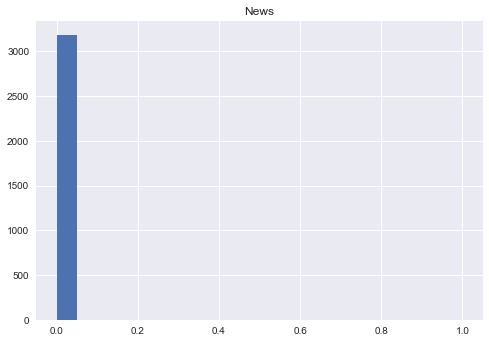

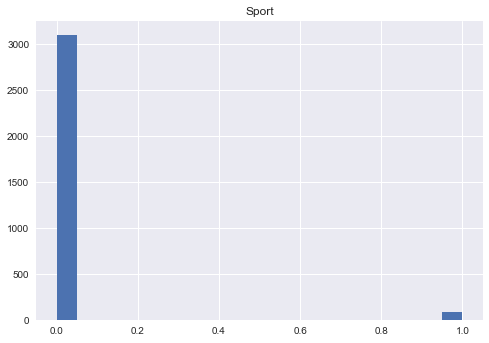

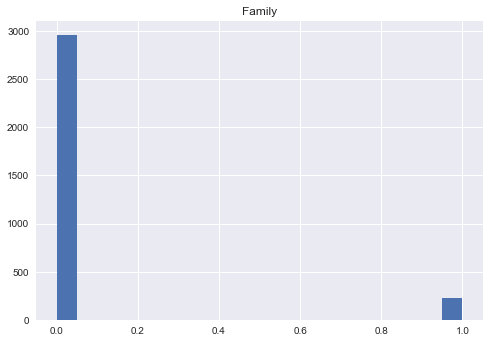

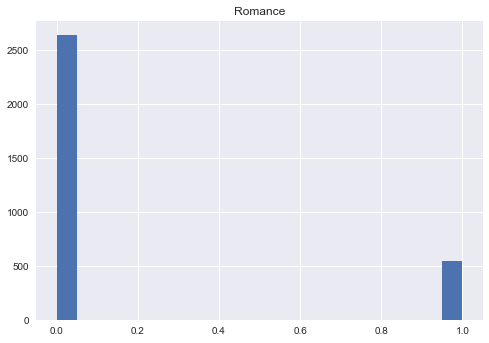

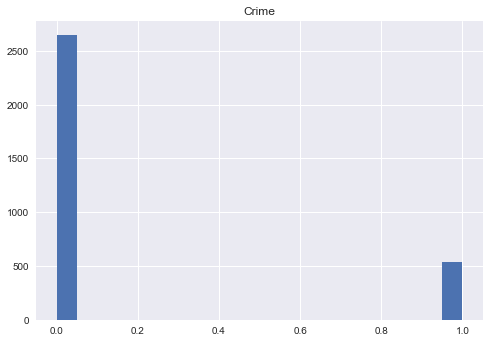

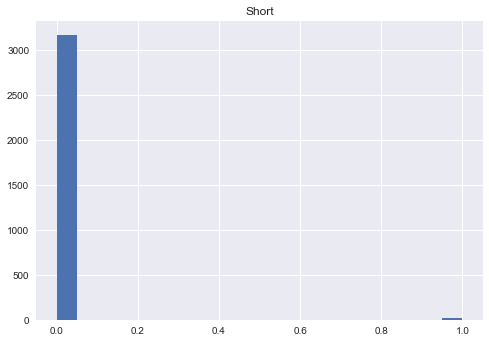

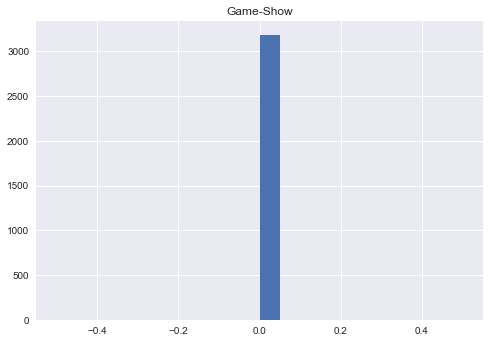

In [0]:
for x in list(X.columns):
    plt.hist(X[x], bins=20)
    plt.title(x)
    plt.show()

In [0]:
from scipy import stats
XT = X.copy()

l=['Year','Runtime','Year', 'Runtime', 'Metascore', 'imdbRating', 'imdbVotes', 'tomatoRating', 'tomatoReviews', 'Budget', 'Date']

print(l)
for i in l:
    XT[i] = stats.boxcox(X[i])[0]
    print(i,np.min(XT[i]))



['Year', 'Runtime', 'Year', 'Runtime', 'Metascore', 'imdbRating', 'imdbVotes', 'tomatoRating', 'tomatoReviews', 'Budget', 'Date']
Year 9.628356907650815e+36
Runtime 0.0
Year 9.628356907650815e+36
Runtime 0.0
Metascore 0.0
imdbRating 0.8339228391866499
imdbVotes 1.8942608311498708
tomatoRating 0.0
tomatoReviews 1.7812755667495406
Budget 16.320064180470855
Date 3.276977619855609e+55


In [0]:
XT['tomatoMeter'].describe()

count    3183.000000
mean       51.945225
std        25.646755
min         0.000000
25%        32.000000
50%        51.945225
75%        73.000000
max       100.000000
Name: tomatoMeter, dtype: float64

In [0]:
from sklearn.cross_validation import train_test_split
XT_train, XT_test, Y_train, Y_test = train_test_split(XT, Y, test_size=0.2, random_state=42)
print(XT_train.head())
print(Y_train.head())

               Year     Runtime  Metascore  imdbRating  imdbVotes  \
40330  9.683956e+36  107.260218  60.655911   34.684972  32.700261   
5166   9.628357e+36  103.170521  45.865443   32.472088  46.235043   
39779  9.966376e+36   80.956813  44.208803   26.308327  20.440493   
39767  9.966376e+36   81.783836  31.677601   19.175541  45.422120   
38886  1.019771e+37   69.881264  44.987739   27.267996  42.503618   

       tomatoMeter  tomatoRating  tomatoReviews  tomatoFresh  tomatoRotten  \
40330    83.000000      7.463879      73.083634   126.000000     25.000000   
5166     57.000000      5.511729      72.680458    86.000000     64.000000   
39779    60.000000      5.639809      48.302567    55.000000     37.000000   
39767    23.000000      3.877538      90.006366    44.000000    150.000000   
38886    51.945225      5.393394      63.409076    73.070245     54.277738   

         ...      Adventure  Music  Reality-TV  News  Sport  Family  Romance  \
40330    ...              0      0  

In [0]:
from sklearn.linear_model import LinearRegression
model_linear=LinearRegression(normalize=True)
model_linear.fit(XT_train, Y_train)
print("Linear Model:", model_linear)
print("coeffecients:", model_linear.coef_)
print("Intercept:", model_linear.intercept_)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
coeffecients: [-3.86126738e-29  2.12687796e+05 -8.82884908e+04  9.74574168e+05
 -5.41123858e+05  1.26868257e+05  8.28544133e+05 -2.06369485e+06
  8.31556655e+05  9.83240764e+05 -4.42984170e+05  6.66364063e+06
 -6.10281896e-01  1.32810185e+05  2.32211140e+00  1.25834092e-47
  1.29871043e+04  9.57631794e+06 -1.28985318e+07  1.64812504e+07
  1.73878943e+07 -5.96046448e-07  2.70334807e+06 -5.34592621e+06
  7.90730107e+05  7.25772719e+06 -2.41138653e+06 -4.12202699e+06
 -1.21278981e+06 -7.15255737e-07  3.87728951e+06 -2.29976004e+06
  3.14718134e+06 -1.31836061e+07 -1.19209290e-07 -1.47047998e+07
  2.19317711e+07  1.81330124e+06  2.38418579e-07 -1.91602094e+07
 -2.49002735e+07 -1.04992633e+07  2.88851256e+06 -7.37206130e+06
  1.26941611e+07  0.00000000e+00]
Intercept: -95477244.15826374


In [0]:
print('R squared value:', model_linear.score(XT_test, Y_test))

R squared value: 0.8837717232476212


In [0]:
train_set=list(range(1,2400,200))
print(train_set)
print(type(train_set))
train_set.append(2530)
print(train_set)

[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201]
<class 'list'>
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2530]


In [0]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = LinearRegression(), X = XT,
                                                   y = Y, train_sizes = train_set, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

In [0]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 40) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000e+00
201     2.629297e+16
401     3.790148e+16
601     3.376414e+16
801     3.457989e+16
1001    3.597990e+16
1201    3.915799e+16
1401    3.808201e+16
1601    3.745989e+16
1801    3.679768e+16
2001    3.644591e+16
2201    3.493999e+16
2530    3.296609e+16
dtype: float64

 ----------------------------------------

Mean validation scores

 1       4.089763e+16
201     3.698442e+16
401     3.907297e+16
601     3.673841e+16
801     3.438039e+16
1001    3.446786e+16
1201    3.456975e+16
1401    3.384992e+16
1601    3.337797e+16
1801    3.326480e+16
2001    3.313675e+16
2201    3.304875e+16
2530    3.301405e+16
dtype: float64


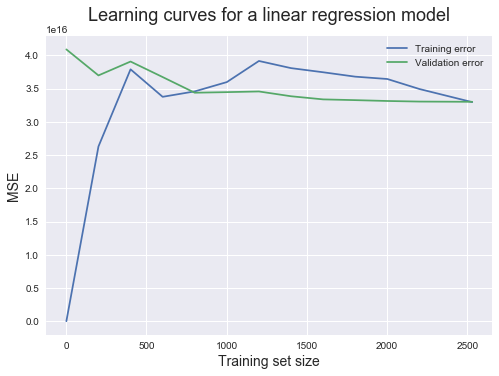

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_set, train_scores_mean, label = 'Training error')
plt.plot(train_set, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,40)
plt.show()

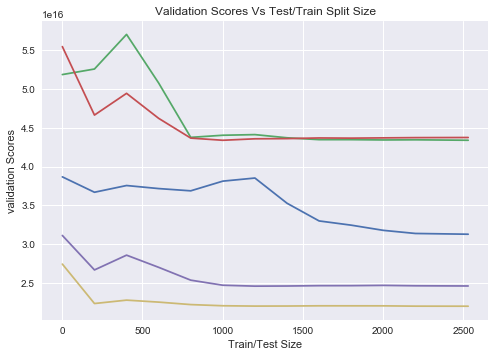

In [0]:
plt.plot(train_sizes,-validation_scores)
plt.ylabel('validation Scores')
plt.xlabel('Train/Test Size')
plt.title("Validation Scores Vs Test/Train Split Size")
plt.show()

# Categorical to Discrete Data

In [0]:
movies_new=movies.copy()

In [0]:
def getvalues(a):
    new_all=[]
    all_genres=[]
    unique_all=[]
    for i in a:
        new_all.append(str(i).split(','))
    new_all=list(chain(*new_all))
    for i in new_all:
        all_genres.append(i.strip())
    unique_all=set(all_genres)
    d={}
    for i in unique_all:
        d[i]=[]
        for j in a:
            j=str(j).strip()
            if i in j:
                d[i].append(1)
            else:
                d[i].append(0)
    return(d)

In [0]:
country=getvalues(movies['Country'])
print(sum(country['USA']))

2759


In [0]:
def addindataframe(d):
    for keys in d.keys():
    #for i in range(len(movies['Genre'])):
        list_key=pd.Series(d[keys])
        #movies[keys].loc[i]=d[keys][i]
        movies_new[keys]=d[keys]    
    #movies.insert(loc=0,column=keys,value=d[keys])

In [0]:
addindataframe(getvalues(movies_new['Country']))

In [0]:
addindataframe(getvalues(movies_new['Language']))

In [0]:
addindataframe(getvalues(movies_new['Rated']))

In [0]:
print(movies.head())
sum(movies_new['USA'])

    Unnamed: 0                  Title  Year  Rated    Released  Runtime  \
12          13      Alone in the Dark  2005      R  2005-01-28     96.0   
20          21      Are We There Yet?  2005     PG  2005-01-21     95.0   
26          27                Be Cool  2005  PG-13  2005-03-04    118.0   
27          28            Beauty Shop  2005  PG-13  2005-03-30    105.0   
28          29  Because of Winn-Dixie  2005     PG  2005-02-18    106.0   

                        Genre        Director  \
12             Horror, Sci-Fi        Uwe Boll   
20  Adventure, Comedy, Family    Brian Levant   
26       Comedy, Crime, Music    F. Gary Gray   
27                     Comedy  Bille Woodruff   
28      Comedy, Drama, Family      Wayne Wang   

                                               Writer  \
12        Elan Mastai, Michael Roesch, Peter Scheerer   
20  Steven Gary Banks (story), Claudia Grazioso (s...   
26  Elmore Leonard (novel), Peter Steinfeld (scree...   
27  Elizabeth Hunter (stor

2759

# Getting only Numerical Data (2)

In [0]:
print(movies_new.shape)
movies_new=movies_new.select_dtypes(include='number')
print(movies_new.shape)
movies_new.describe()

(3183, 285)
(3183, 263)


,Unnamed: 0,Year,Runtime,Metascore,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,...,TV-G,TV-14,NC-17,PG,UNRATED,R,G,TV-PG,PG-13,NOT RATED
count,3183.000000,3183.000000,3183.000000,2747.000000,3136.000000,3.136000e+03,2775.000000,2775.000000,2776.000000,2776.000000,...,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000,3183.000000
mean,70506.075715,2008.409362,104.184182,52.939934,6.298119,8.499268e+04,51.945225,5.607387,127.347983,73.070245,...,0.001257,0.001257,0.000943,0.461828,0.008168,0.437952,0.479108,0.000943,0.336161,0.023563
std,49746.039422,4.364217,19.912862,17.665430,1.103924,1.326763e+05,27.468142,1.447502,67.324916,63.502042,...,0.035433,0.035433,0.030691,0.498619,0.090023,0.496213,0.499642,0.030691,0.472469,0.151706
min,13.000000,2001.000000,1.000000,1.000000,1.600000,5.000000e+00,0.000000,1.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13153.000000,2005.000000,92.000000,40.000000,5.700000,8.705750e+03,29.000000,4.500000,81.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,110321.000000,2008.000000,101.000000,53.000000,6.400000,3.637600e+04,52.000000,5.600000,128.500000,57.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,111133.500000,2012.000000,114.000000,66.000000,7.100000,1.018922e+05,76.000000,6.700000,171.000000,111.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,111998.000000,2017.000000,334.000000,100.000000,9.000000,1.670736e+06,100.000000,9.200000,355.000000,343.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
movies_new['Metascore'].fillna(np.mean(movies_new['Metascore']),inplace=True)
movies_new['imdbRating'].fillna(np.mean(movies_new['imdbRating']),inplace=True)
movies_new['imdbVotes'].fillna(np.mean(movies_new['imdbVotes']),inplace=True)
movies_new['tomatoMeter'].fillna(np.mean(movies_new['tomatoMeter']),inplace=True)
movies_new['tomatoFresh'].fillna(np.mean(movies_new['tomatoFresh']),inplace=True)
movies_new['tomatoRating'].fillna(np.mean(movies_new['tomatoRating']),inplace=True)
movies_new['tomatoRotten'].fillna(np.mean(movies_new['tomatoRotten']),inplace=True)
movies_new['tomatoUserMeter'].fillna(np.mean(movies_new['tomatoUserMeter']),inplace=True)
movies_new['tomatoUserRating'].fillna(np.mean(movies_new['tomatoUserRating']),inplace=True)
movies_new['tomatoUserReviews'].fillna(np.mean(movies_new['tomatoUserReviews']),inplace=True)
movies_new['tomatoReviews'].fillna(np.mean(movies_new['tomatoReviews']),inplace=True)

In [0]:
for i in list(movies_new.columns):
    print(i,sum(movies_new[i].isnull()))

Unnamed: 0 0
Year 0
Runtime 0
Metascore 0
imdbRating 0
imdbVotes 0
tomatoMeter 0
tomatoRating 0
tomatoReviews 0
tomatoFresh 0
tomatoRotten 0
tomatoUserMeter 0
tomatoUserRating 0
tomatoUserReviews 0
Budget 0
Domestic_Gross 0
Gross 0
Date 0
Nominations 0
Wins 0
Comedy 0
Animation 0
Fantasy 0
Adult 0
Documentary 0
Drama 0
Thriller 0
Sci-Fi 0
History 0
War 0
Mystery 0
Talk-Show 0
Action 0
Horror 0
Musical 0
Biography 0
Film-Noir 0
Western 0
Adventure 0
Music 0
Reality-TV 0
News 0
Sport 0
Family 0
Romance 0
Crime 0
Short 0
Game-Show 0
Australia 0
Spain 0
Iceland 0
Chile 0
Slovenia 0
Peru 0
Germany 0
Iran 0
Cameroon 0
Hong Kong 0
Cyprus 0
Philippines 0
Canada 0
Belgium 0
Algeria 0
Colombia 0
Antarctica 0
Kazakhstan 0
Brazil 0
Ecuador 0
Portugal 0
Argentina 0
United Arab Emirates 0
Paraguay 0
Mexico 0
Guyana 0
New Zealand 0
Norway 0
UK 0
USA 0
Romania 0
Croatia 0
Sweden 0
Lithuania 0
Hungary 0
Bosnia and Herzegovina 0
Bulgaria 0
Liechtenstein 0
Cambodia 0
Israel 0
Netherlands 0
Thailand 0
Sou

In [0]:
movies_new.columns

Index(['Unnamed: 0', 'Year', 'Runtime', 'Metascore', 'imdbRating', 'imdbVotes',
       'tomatoMeter', 'tomatoRating', 'tomatoReviews', 'tomatoFresh',
       ...
       'TV-G', 'TV-14', 'NC-17', 'PG', 'UNRATED', 'R', 'G', 'TV-PG', 'PG-13',
       'NOT RATED'],
      dtype='object', length=263)

In [0]:
X_new=movies_new.loc[:,movies_new.columns !='Gross']
X_new.head()

,Unnamed: 0,Year,Runtime,Metascore,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,...,TV-G,TV-14,NC-17,PG,UNRATED,R,G,TV-PG,PG-13,NOT RATED
12,13,2005,96.0,9.0,2.3,37613.0,1.0,1.7,117.0,1.0,...,0,0,0,0,0,1,0,0,0,0
20,21,2005,95.0,27.0,4.6,22611.0,11.0,3.3,116.0,13.0,...,0,0,0,1,0,0,1,0,0,0
26,27,2005,118.0,37.0,5.7,59443.0,30.0,4.6,169.0,50.0,...,0,0,0,1,0,0,1,0,1,0
27,28,2005,105.0,53.0,5.5,13197.0,37.0,5.3,115.0,43.0,...,0,0,0,1,0,0,1,0,1,0
28,29,2005,106.0,54.0,6.4,8427.0,54.0,5.8,119.0,64.0,...,0,0,0,1,0,0,1,0,0,0


In [0]:
X_new=X_new.loc[:,X_new.columns !='Unnamed: 0']
#X=X.reset_index()
#X=X.loc[:,X.columns !='index']
X_new.head()

,Year,Runtime,Metascore,imdbRating,imdbVotes,tomatoMeter,tomatoRating,tomatoReviews,tomatoFresh,tomatoRotten,...,TV-G,TV-14,NC-17,PG,UNRATED,R,G,TV-PG,PG-13,NOT RATED
12,2005,96.0,9.0,2.3,37613.0,1.0,1.7,117.0,1.0,116.0,...,0,0,0,0,0,1,0,0,0,0
20,2005,95.0,27.0,4.6,22611.0,11.0,3.3,116.0,13.0,103.0,...,0,0,0,1,0,0,1,0,0,0
26,2005,118.0,37.0,5.7,59443.0,30.0,4.6,169.0,50.0,119.0,...,0,0,0,1,0,0,1,0,1,0
27,2005,105.0,53.0,5.5,13197.0,37.0,5.3,115.0,43.0,72.0,...,0,0,0,1,0,0,1,0,1,0
28,2005,106.0,54.0,6.4,8427.0,54.0,5.8,119.0,64.0,55.0,...,0,0,0,1,0,0,1,0,0,0


In [0]:
Y_new=movies_new['Gross']
Y_new.head()
Y_new.describe()

count    3.183000e+03
mean     9.662560e+07
std      1.815449e+08
min      0.000000e+00
25%      2.404040e+06
50%      3.016378e+07
75%      1.028745e+08
max      2.783919e+09
Name: Gross, dtype: float64

In [0]:
from sklearn.cross_validation import train_test_split
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, test_size=0.2, random_state=45)
print(X_train_new.head())
print(Y_train_new.head())

       Year  Runtime  Metascore  imdbRating  imdbVotes  tomatoMeter  \
39811  2007     90.0       49.0         5.5    13858.0    51.945225   
39973  2005    120.0       61.0         6.9     2661.0    53.000000   
4167   2002     81.0       56.0         7.1   207877.0    71.000000   
19201  2007     96.0       74.0         7.2   110239.0    85.000000   
23079  2005    187.0       81.0         7.2   315724.0    84.000000   

       tomatoRating  tomatoReviews  tomatoFresh  tomatoRotten    ...      \
39811      5.607387     127.347983    73.070245     54.277738    ...       
39973      5.900000      68.000000    36.000000     32.000000    ...       
4167       6.500000     188.000000   134.000000     54.000000    ...       
19201      7.200000     157.000000   133.000000     24.000000    ...       
23079      7.700000     258.000000   216.000000     42.000000    ...       

       TV-G  TV-14  NC-17  PG  UNRATED  R  G  TV-PG  PG-13  NOT RATED  
39811     0      0      0   0        0  1  0

# Regression Model (2)

In [0]:
from sklearn.linear_model import LinearRegression
model_linear_new=LinearRegression(normalize=True)
model_linear_new.fit(X_train_new, Y_train_new)
print("Linear Model:", model_linear)
print("coeffecients:", model_linear.coef_)
print("Intercept:", model_linear.intercept_)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
coeffecients: [-3.86126738e-29  2.12687796e+05 -8.82884908e+04  9.74574168e+05
 -5.41123858e+05  1.26868257e+05  8.28544133e+05 -2.06369485e+06
  8.31556655e+05  9.83240764e+05 -4.42984170e+05  6.66364063e+06
 -6.10281896e-01  1.32810185e+05  2.32211140e+00  1.25834092e-47
  1.29871043e+04  9.57631794e+06 -1.28985318e+07  1.64812504e+07
  1.73878943e+07 -5.96046448e-07  2.70334807e+06 -5.34592621e+06
  7.90730107e+05  7.25772719e+06 -2.41138653e+06 -4.12202699e+06
 -1.21278981e+06 -7.15255737e-07  3.87728951e+06 -2.29976004e+06
  3.14718134e+06 -1.31836061e+07 -1.19209290e-07 -1.47047998e+07
  2.19317711e+07  1.81330124e+06  2.38418579e-07 -1.91602094e+07
 -2.49002735e+07 -1.04992633e+07  2.88851256e+06 -7.37206130e+06
  1.26941611e+07  0.00000000e+00]
Intercept: -95477244.15826374


In [0]:
Y_predictions_new = model_linear_new.predict(X_test_new)
print(Y_predictions_new)

[-3.27680000e+06  1.45620992e+08  1.04595456e+08  6.19970560e+07
 -1.67772160e+07 -2.49036800e+06 -1.78257920e+07 -2.28065280e+07
  1.88088320e+08  2.11156992e+08  1.48373504e+08  3.34626816e+08
  3.13655296e+08 -3.93216000e+05  4.42630144e+08  3.18169192e+22
  7.82499840e+07  1.14688000e+08 -2.16268800e+07  6.55360000e+06
  2.77872640e+07  2.68828672e+08  1.00270080e+08  1.49553152e+08
  9.04396800e+06  2.45628928e+08  5.63609600e+07  8.57210880e+07
 -1.66854656e+08 -8.25753600e+06  1.12721920e+07  1.06037248e+08
  3.77487360e+07  3.04087040e+07  2.70008320e+07  2.12336640e+07
  2.56901120e+07  6.02669056e+08  2.85999104e+08  1.73015040e+07
 -1.36314880e+07  0.00000000e+00  1.57430579e+09  5.66231040e+07
  7.53664000e+07 -9.83040000e+06  2.31604224e+08  4.04993776e+22
  1.62529280e+07  1.39853824e+08 -1.96608000e+06 -1.36314880e+07
 -1.42868480e+07  5.92445440e+07 -2.79183360e+07  5.28220160e+07
  2.70008320e+07  5.89824000e+06 -1.49422080e+07  1.38936320e+07
 -1.10100480e+07 -3.46030

In [0]:
print('R squared value:', model_linear_new.score(X_test_new, Y_test_new))

R squared value: -4.4423967613589234e+26


In [0]:
train_set_new=list(range(1,2400,200))
print(train_set_new)
print(type(train_set_new))
train_set_new.append(2530)
print(train_set_new)

[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201]
<class 'list'>
[1, 201, 401, 601, 801, 1001, 1201, 1401, 1601, 1801, 2001, 2201, 2530]


In [0]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = LinearRegression(), X = X_new,
                                                   y = Y_new, train_sizes = train_set_new, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

In [0]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 40) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000e+00
201     8.043066e+14
401     1.710196e+15
601     1.918082e+15
801     1.943640e+15
1001    2.082383e+15
1201    2.454715e+15
1401    2.435733e+15
1601    2.450380e+15
1801    2.508974e+15
2001    2.497765e+15
2201    2.429574e+15
2530    2.360962e+15
dtype: float64

 ----------------------------------------

Mean validation scores

 1       4.089763e+16
201     6.997173e+15
401     4.796336e+15
601     4.200468e+15
801     3.542246e+15
1001    3.415695e+15
1201    3.392602e+15
1401    3.240001e+15
1601    3.243706e+15
1801    3.211219e+15
2001    3.182497e+15
2201    3.133711e+15
2530    3.025373e+15
dtype: float64


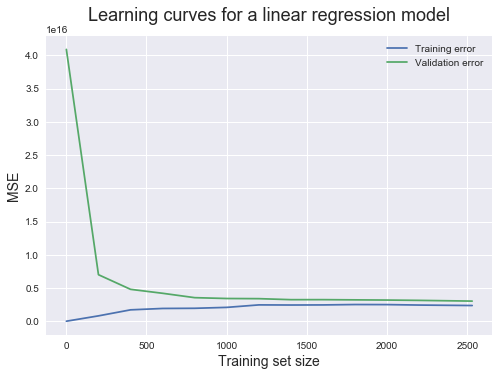

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_set_new, train_scores_mean, label = 'Training error')
plt.plot(train_set_new, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,40)
plt.show()

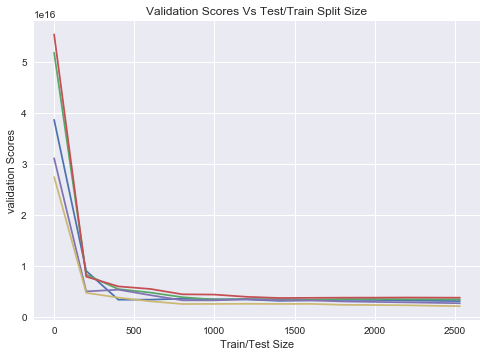

In [0]:
plt.plot(train_sizes,-validation_scores)
plt.ylabel('validation Scores')
plt.xlabel('Train/Test Size')
plt.title("Validation Scores Vs Test/Train Split Size")
plt.show()

# END